# SLR FINAL EXAM

### DATA DESCRIPTION: 
The data set consists of complete educational details of students right from their
schooling to MBA and previous work experience. Our main objective is to predict the Salary of the students
based on the info available. The data set consists of 391 observations and 19 variables.

### ATTRIBUTES:

SlNo - ID of the student

Gender - Gender of Student

Percent_SSC - Percentage of marks scored in SSC

Board_SSC - Types of Boards in SSC


Percent_HSC - Percentage of marks scored in HSC

Board_HSC - Types of Boards in HSC

Stream_HSC - Specialization in HSC

Percent Degree - Percentage of marks scored in Degree

Course_Degree - Different courses in degree

Experience_Yrs - Work Experience of the Students

Entrance_Test - Test which students give for MBA college Entrance

Percentile_ET - Percentage of marks scored in Entrance_Test


Percent_MBA - Percentage of marks scored in MBA

Specialization_MBA - Specialization in MBA

Marks Communication - Percentage of marks scored in Communication

Marks_Projectwork - Percentage of marks scored in Project Work


Marks_BOCA - Percentage of marks scored by students in Extra Curricular

activities

Placement - Whether Student got placed or not


Salary - Salary of students



### 1.	 Read the dataset (tab, csv, xls, txt, inbuilt dataset) 

## Kindly change the below cells from markdown to code and execute it 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_excel("Admission.xlsx")

df.head()


,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


### 2.	Summarize important observations from the data set (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	What are the number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 391 non-null    int64  
 1   Gender               391 non-null    object 
 2   Percent_SSC          391 non-null    float64
 3   Board_SSC            391 non-null    object 
 4   Percent_HSC          391 non-null    float64
 5   Board_HSC            391 non-null    object 
 6   Stream_HSC           391 non-null    object 
 7   Percent_Degree       391 non-null    float64
 8   Course_Degree        391 non-null    object 
 9   Experience_Yrs       391 non-null    int64  
 10  Entrance_Test        324 non-null    object 
 11  Percentile_ET        391 non-null    float64
 12  Percent_MBA          391 non-null    float64
 13  Specialization_MBA   391 non-null    object 
 14  Marks_Communication  391 non-null    int64  
 15  Marks_Projectwork    391 non-null    int

In [4]:
df.describe()

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,196.000000,64.652353,63.795294,62.983606,0.478261,54.934962,61.667698,60.539642,68.363171,64.378517,219078.260870
std,113.016223,10.960426,11.417726,8.916152,0.667112,31.168264,5.854399,8.824084,7.145095,9.582834,138311.647036
min,1.000000,37.000000,40.000000,35.000000,0.000000,0.000000,50.830000,50.000000,50.000000,50.000000,0.000000
25%,98.500000,56.000000,54.000000,57.525000,0.000000,41.190000,57.195000,53.000000,64.000000,57.000000,172800.000000
50%,196.000000,64.500000,63.000000,63.000000,0.000000,62.000000,61.010000,58.000000,69.000000,63.000000,240000.000000
75%,293.500000,74.000000,72.000000,69.000000,1.000000,78.000000,66.020000,67.000000,74.000000,72.500000,300000.000000
max,391.000000,87.200000,94.700000,89.000000,3.000000,98.690000,77.890000,88.000000,87.000000,96.000000,940000.000000


In [5]:
# c) use a for loop to loop through column names
# use value_counts function /len(df)  *100 to get percentage 
cat_cols = df.select_dtypes(object)
for i in cat_cols:
    print(round((df[i].value_counts()/len(df))*100))

M    68.0
F    32.0
Name: Gender, dtype: float64
Others    51.0
CBSE      29.0
ICSE      20.0
Name: Board_SSC, dtype: float64
Others    63.0
CBSE      25.0
ISC       12.0
Name: Board_HSC, dtype: float64
Commerce    57.0
Science     39.0
Arts         5.0
Name: Stream_HSC, dtype: float64
Management               42.0
Commerce                 30.0
Engineering               9.0
Computer Applications     8.0
Science                   6.0
Arts                      3.0
Others                    1.0
Name: Course_Degree, dtype: float64
MAT      68.0
K-MAT     6.0
CAT       6.0
PGCET     2.0
GCET      1.0
G-MAT     0.0
XAT       0.0
G-SAT     0.0
Name: Entrance_Test, dtype: float64
Marketing & Finance    57.0
Marketing & HR         40.0
Marketing & IB          3.0
Name: Specialization_MBA, dtype: float64
Placed        80.0
Not Placed    20.0
Name: Placement, dtype: float64


### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the data normally distributed? Is it a defect? Why or why not? 


<AxesSubplot:>

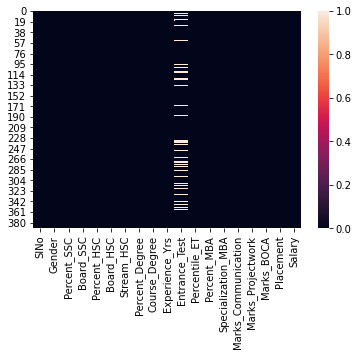

In [6]:
# a) isnull and sum 
sns.heatmap(df.isnull())
# do percentage and then 

# alternatively you can also do heatmap of df.isnull()

In [7]:
# only entrance test has nulls lets look at the categories to determine if its a defect
df['Entrance_Test'].unique()

array(['MAT', nan, 'K-MAT', 'CAT', 'PGCET', 'GCET', 'G-MAT', 'XAT',
       'G-SAT'], dtype=object)

In [8]:
# nan signifies no entrance test. lets impute it
df['Entrance_Test'] = df['Entrance_Test'].fillna('None')

<AxesSubplot:>

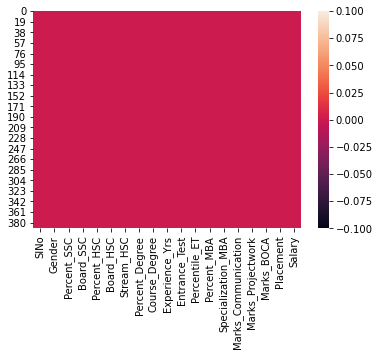

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

SlNo                   0
Gender                 0
Percent_SSC            0
Board_SSC              0
Percent_HSC            0
Board_HSC              0
Stream_HSC             0
Percent_Degree         0
Course_Degree          0
Experience_Yrs         0
Entrance_Test          0
Percentile_ET          0
Percent_MBA            0
Specialization_MBA     0
Marks_Communication    0
Marks_Projectwork      0
Marks_BOCA             0
Placement              0
Salary                 0
dtype: int64

In [11]:
df.select_dtypes(np.number).columns

Index(['SlNo', 'Percent_SSC', 'Percent_HSC', 'Percent_Degree',
       'Experience_Yrs', 'Percentile_ET', 'Percent_MBA', 'Marks_Communication',
       'Marks_Projectwork', 'Marks_BOCA', 'Salary'],
      dtype='object')

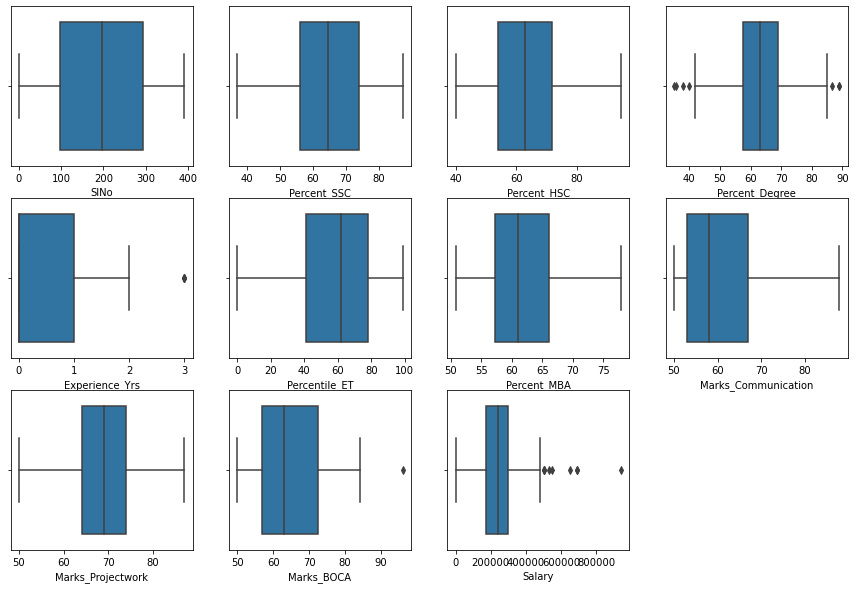

In [12]:
# plot boxplots for all
plt.figure(figsize=(15,10))
numcols = df.select_dtypes(np.number).columns
j=1
for i in numcols:
    plt.subplot(3,4,j)
    sns.boxplot(x= df[i])
    j+=1


In [13]:
# do iqr method and filter the df
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

ll = q1-1.5*iqr
ul = q3+1.5*iqr

In [14]:
df = df[~((df<ll) | (df>ul)).any(axis=1)]

<ipython-input-14-4d61d55490d9>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<ll) | (df>ul)).any(axis=1)]
<ipython-input-14-4d61d55490d9>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<ll) | (df>ul)).any(axis=1)]


<AxesSubplot:>

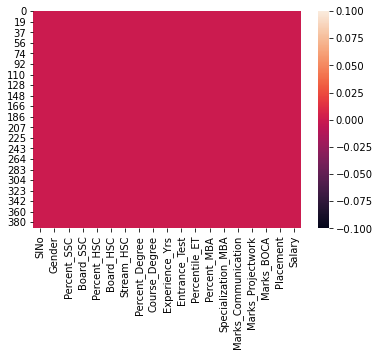

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,None,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


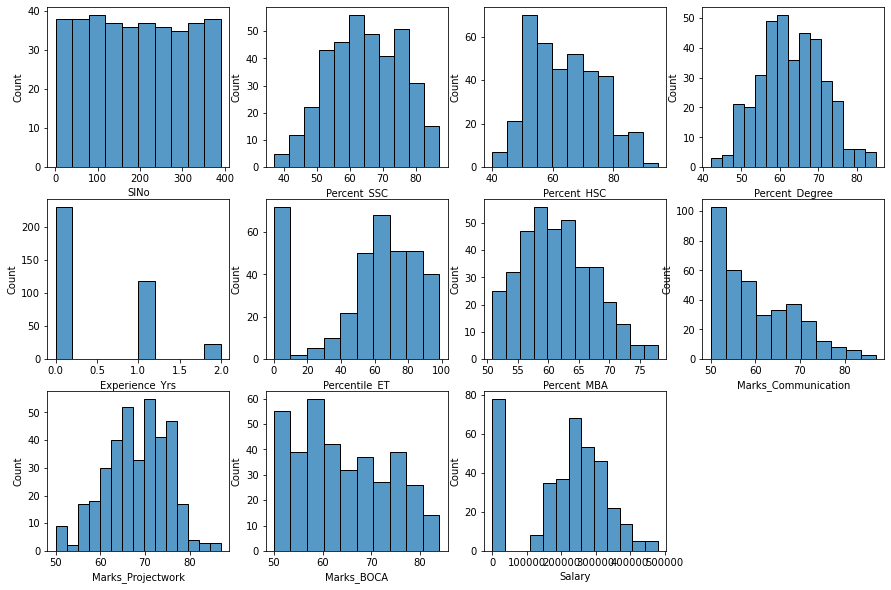

In [17]:
# do a histplot kdeplot or distplot for all numerical columns
plt.figure(figsize=(15,10))
numcols = df.select_dtypes(np.number).columns
j=1
for i in numcols:
    plt.subplot(3,4,j)
    sns.histplot(data = df, x=i)
    j+=1

### 4.	Summarize relationships among variables (10 marks)  

a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

b.	Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?

 Hint: based on your observations you may want to transform features or create additional features.


In [18]:
# a) make a heatmap
#  close to +1 then positive correlation 
# close to - 1 then negative 
# 0 then no correlation

# wrtie a comment that you can exclude one of the variables if two variables are highly correlated (dont exclude yet)
# say you will do vif to confirm and eliminate (dont do it yet)





<AxesSubplot:>

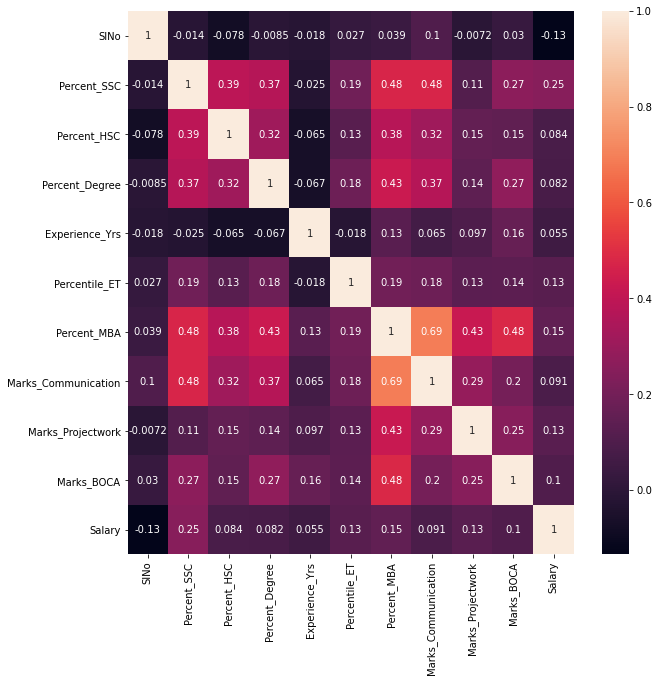

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

In [20]:
# b) do scattter plots? if not linear i guess we dont include need to check tomorrow

### 5.	Split dataset into train and test (70:30) (5 marks)

a.	Are both train and test representative of the overall data? How would you ascertain this statistically?



In [21]:
# # define your target
# # define your features
# df_target = df['Salary']
# df_features = df.drop('Salary', axis = 1)

# df_cat = df_features.select_dtypes(object)
# df_num = df_features.select_dtypes(np.number)

# # encode only categoric features
# # le = LabelEncoder()
# df_cat_encoded = pd.get_dummies(data = df_cat, drop_first=True)

# # concat df_num and encoded and you get your X
# X_unscaled = pd.concat([df_num, df_cat_encoded], axis = 1)

# # scale the X
# ss = StandardScaler()
# X = pd.DataFrame(ss.fit_transform(X_unscaled), columns = df_num.columns)

# # scale the target explicitly to get your y
# y = (df_target - df_target.mean())/df_target.std()

In [44]:
# keethana teps
df_target = df['Salary']
df_features = df.drop(['Salary','SlNo'], axis = 1)

df_cat = df_features.select_dtypes(object)
df_num = df_features.select_dtypes(np.number)

df_cat_encoded = pd.get_dummies(data = df_cat, drop_first=True)
ss = StandardScaler()
df_num_scaled = pd.DataFrame(ss.fit_transform(df_num), columns = df_num.columns)

df_num_scaled.reset_index(inplace=True, drop = True)
df_cat_encoded.reset_index(inplace=True, drop = True)

X = pd.concat([df_num_scaled, df_cat_encoded], axis = 1)
y = ss.fit_transform(pd.DataFrame(df_target))

# y = pd.DataFrame((df_target - df_target.mean())/df_target.std())

In [45]:
X.head()

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Gender_M,...,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_None,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Placement_Placed
0,-0.253131,2.154746,-1.333401,-0.726105,0.005788,-0.461807,-1.189632,-0.450021,1.049790,1,...,0,0,0,1,0,0,0,1,0,1
1,1.069609,1.027356,1.520202,0.916486,1.019287,0.830640,1.013078,0.256828,1.155711,1,...,0,0,0,1,0,0,0,0,0,1
2,0.669925,1.264936,0.444632,-0.726105,-1.763814,-1.479523,-1.189632,-1.015500,-0.539027,1,...,0,0,0,0,1,0,0,0,0,1
3,-0.437743,-0.069779,-0.604201,-0.726105,0.649279,-0.634594,-0.725904,-0.308651,-0.221264,1,...,0,0,0,1,0,0,0,0,0,1
4,-0.345437,-0.781627,-1.090334,0.916486,0.359708,-0.352951,-0.957768,-0.450021,0.308342,1,...,0,0,0,1,0,0,0,1,0,1


In [47]:
# train test split (use the full dataset without dropping any columns for multicolli and stuff we'll do those for model improvement)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# 2sample independent ttest (idk i havent tried keerthana told me)
# need to ask keerthana to help us with code snippet or steal from stats notebooks

(259, 33)
(112, 33)
(259, 1)
(112, 1)


### 6.	Fit a base model. Please write your key observations (15 marks) 

a.	What is the overall R2? Please comment on whether it is good or not.

b.	What is the adjusted R2? Is it different from R2? Why?

c.	Which variables are significant?

d.	Is there multicollinearity?

e.	Which other key model output parameters do you want to look at? 


## BASE

In [48]:
X.isnull().sum()

Percent_SSC                            0
Percent_HSC                            0
Percent_Degree                         0
Experience_Yrs                         0
Percentile_ET                          0
Percent_MBA                            0
Marks_Communication                    0
Marks_Projectwork                      0
Marks_BOCA                             0
Gender_M                               0
Board_SSC_ICSE                         0
Board_SSC_Others                       0
Board_HSC_ISC                          0
Board_HSC_Others                       0
Stream_HSC_Commerce                    0
Stream_HSC_Science                     0
Course_Degree_Commerce                 0
Course_Degree_Computer Applications    0
Course_Degree_Engineering              0
Course_Degree_Management               0
Course_Degree_Others                   0
Course_Degree_Science                  0
Entrance_Test_G-MAT                    0
Entrance_Test_G-SAT                    0
Entrance_Test_GC

In [49]:
# add constant to your model if youre using OLS method (if using sklearn then skip)
Xc_train = sm.add_constant(X_train)
# ols method steps below
# fit the model to ytrain and xtrain
lr_full = sm.OLS(y_train,Xc_train).fit()

# model.summary()
lr_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     34.37
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           2.93e-70
Time:                        16:16:27   Log-Likelihood:                -139.40
No. Observations:                 259   AIC:                             346.8
Df Residuals:                     225   BIC:                             467.7
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.4084      0.219     -6.418      0.000      -1.841      -0.976
Percent_SSC                             0.0247      0.039      0.634      0.527      -0.052       0.102
Percent_HSC                            -0.0073      0.038     -0.191      0.849      -0.082       0.068
Percent_Degree                          0.0587      0.035      1.663      0.098      -0.011       0.128
Experience_Yrs                          0.0374      0.032      1.172      0.242      -0.025       0.100
Percentile_ET                           0.1710      0.061      2.825      0.005       0.052       0.290
Percent_MBA                             0.0322      0.047      0.679      0.498      -0.061       0.126
Marks_Communication                     0.0268      0.044      0.613      0.540      -0.059       0.113
Marks_Projectwork                      -0.0113      0.034     -0.331      0.741      -0.078       0.056
Marks_BOCA                             -0.0121      0.036     -0.341      0.733      -0.082       0.058
Gender_M                                0.2049      0.069      2.974      0.003       0.069       0.341
Board_SSC_ICSE                         -0.1933      0.118     -1.639      0.103      -0.426       0.039
Board_SSC_Others                       -0.0869      0.098     -0.883      0.378      -0.281       0.107
Board_HSC_ISC                           0.0435      0.137      0.319      0.750      -0.226       0.313
Board_HSC_Others                        0.1016      0.099      1.030      0.304      -0.093       0.296
Stream_HSC_Commerce                     0.1679      0.142      1.183      0.238      -0.112       0.447
Stream_HSC_Science                      0.0250      0.156      0.161      0.872      -0.281       0.332
Course_Degree_Commerce                 -0.1486      0.189     -0.786      0.433      -0.521       0.224
Course_Degree_Computer Applications    -0.0603      0.203     -0.298      0.766      -0.459       0.339
Course_Degree_Engineering              -0.0093      0.196     -0.048      0.962      -0.396       0.377
Course_Degree_Management               -0.2788      0.179     -1.557      0.121      -0.632       0.074
Course_Degree_Others                   -0.2787      0.378     -0.737      0.462      -1.024       0.466
Course_Degree_Science                  -0.2324      0.221     -1.050      0.295      -0.668       0.204
Entrance_Test_G-MAT                     0.2371      0.480      0.494      0.622      -0.709       1.184
Entrance_Test_G-SAT                    -0.2603      0.492     -0.529      0.597      -1.229       0.709
Entrance_Test_GCET                     -0.2314      0.359     -0.644      0.520      -0.939       0.476
Entrance_Test_K-MAT                    -0.1297      0.165     -0.78

In [50]:
# a and b) check summary
# r2 should be high its a %
#r2 = 0.835
# adjusted r2 is penalizes your r2 if you add more noise (useless variables to your model) 
#adj r2 = 0.809
# adj r2 drops with noise variables


In [51]:
# c) check p values for each variable in summary
# >0.05 means insignificant
#lot of the variables are insignificant

In [52]:
# d) check cond. no. for multicollinearity (should be low)
# multicol is high

# e) check durbin watson for autocorrelation
# slightly positibe to no auto corr

# f) check f statistic
# Since the p-value is less than the significance level (0.05), 
# we can conclude that our regression model fits the data better than the intercept-only model.

In [53]:
Xc_test = sm.add_constant(X_test)

In [54]:
y_train_pred = lr_full.predict(Xc_train)

y_test_pred = lr_full.predict(Xc_test)

In [55]:
rmse_train_full = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test_full = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train_full = r2_score(y_train,y_train_pred)
r2_test_full = r2_score(y_test,y_test_pred)

In [56]:
print(rmse_test_full)
print(rmse_train_full)
print(r2_train_full)
print(r2_test_full)

0.5294005234566338
0.41449216727089194
0.834470044733999
0.6876520435030422


### 7.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


## VIF

In [57]:
df_numeric_features_vif = df_num

In [64]:
for ind in range(len(df_numeric_features_vif.columns)):
    
    vif = pd.DataFrame()

    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    vif["Features"] = df_numeric_features_vif.columns
    
    multi = vif[vif['VIF_Factor'] > 10]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor        Features
0    4.466169     Percent_HSC
1    1.480865  Experience_Yrs
2    4.044090   Percentile_ET


In [65]:
df_numeric_features_vif.head()

,Percent_HSC,Experience_Yrs,Percentile_ET
0,88.00,0,55.0
1,75.33,1,86.5
2,78.00,0,0.0
3,63.00,0,75.0
4,55.00,1,66.0


In [66]:
ss = StandardScaler()
df_num_scaled_vif = pd.DataFrame(ss.fit_transform(df_numeric_features_vif), columns = df_numeric_features_vif.columns)

df_num_scaled_vif.reset_index(inplace=True, drop = True)
df_cat_encoded.reset_index(inplace=True, drop = True)

X = pd.concat([df_num_scaled_vif, df_cat_encoded], axis = 1)
y = ss.fit_transform(pd.DataFrame(df_target))

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(259, 27)
(112, 27)
(259, 1)
(112, 1)


In [68]:
Xc_train = sm.add_constant(X_train)

lr_full_vif = sm.OLS(y_train,Xc_train).fit()

# model.summary()
lr_full_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     41.30
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           2.68e-73
Time:                        16:21:40   Log-Likelihood:                -144.06
No. Observations:                 259   AIC:                             344.1
Df Residuals:                     231   BIC:                             443.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.4535      0.219     -6.641      0.000      -1.885      -1.022
Percent_HSC                             0.0440      0.032      1.369      0.172      -0.019       0.107
Experience_Yrs                          0.0426      0.031      1.381      0.168      -0.018       0.103
Percentile_ET                           0.1977      0.059      3.379      0.001       0.082       0.313
Gender_M                                0.1481      0.063      2.333      0.021       0.023       0.273
Board_SSC_ICSE                         -0.1288      0.114     -1.126      0.261      -0.354       0.097
Board_SSC_Others                       -0.0377      0.094     -0.401      0.689      -0.223       0.147
Board_HSC_ISC                          -0.0007      0.132     -0.005      0.996      -0.260       0.259
Board_HSC_Others                        0.0771      0.097      0.792      0.429      -0.115       0.269
Stream_HSC_Commerce                     0.1855      0.140      1.328      0.185      -0.090       0.461
Stream_HSC_Science                      0.1014      0.149      0.679      0.498      -0.193       0.396
Course_Degree_Commerce                 -0.0924      0.188     -0.492      0.623      -0.462       0.277
Course_Degree_Computer Applications     0.0408      0.197      0.207      0.837      -0.348       0.430
Course_Degree_Engineering               0.0538      0.195      0.275      0.783      -0.331       0.438
Course_Degree_Management               -0.1947      0.176     -1.104      0.271      -0.542       0.153
Course_Degree_Others                   -0.2011      0.372     -0.540      0.590      -0.935       0.532
Course_Degree_Science                  -0.1751      0.220     -0.797      0.426      -0.608       0.258
Entrance_Test_G-MAT                     0.2180      0.476      0.458      0.648      -0.721       1.157
Entrance_Test_G-SAT                    -0.3310      0.489     -0.677      0.499      -1.294       0.632
Entrance_Test_GCET                     -0.4128      0.353     -1.170      0.243      -1.108       0.282
Entrance_Test_K-MAT                    -0.1696      0.162     -1.045      0.297      -0.489       0.150
Entrance_Test_MAT                      -0.4427      0.122     -3.616      0.000      -0.684      -0.202
Entrance_Test_None                      0.0932      0.169      0.550      0.583      -0.241       0.427
Entrance_Test_PGCET                     0.0007      0.223      0.003      0.998      -0.439       0.440
Entrance_Test_XAT                      -0.1471      0.471     -0.312      0.755      -1.076       0.782
Specialization_MBA_Marketing & HR      -0.1241      0.064     -1.936      0.054      -0.250       0.002
Specialization_MBA_Marketing & IB      -0.0010      0.145     -0.00

In [69]:
Xc_test = sm.add_constant(X_test)

In [74]:
y_train_pred = lr_full_vif.predict(Xc_train)

y_test_pred = lr_full_vif.predict(Xc_test)

In [75]:
rmse_train_vif = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test_vif = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train_vif = r2_score(y_train,y_train_pred)
r2_test_vif = r2_score(y_test,y_test_pred)

In [77]:
print(rmse_test_vif)
print(rmse_train_vif)
print(r2_train_vif)
print(r2_test_vif)

0.5427881634388353
0.42201685195966565
0.8284054347624064
0.6716547990394988


## SIGNI COL (0.05)

In [79]:
signi_col = ['Percentile_ET', 'Gender_M','Entrance_Test_MAT', 'Placement_Placed', 'Specialization_MBA_Marketing & HR']
X = X[signi_col]

In [80]:
X_train = X_train[signi_col]
X_test = X_test[signi_col]

In [81]:
Xc_train = sm.add_constant(X_train)

lr_signi_var = sm.OLS(y_train,Xc_train).fit()

# model.summary()
lr_signi_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     216.6
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           3.08e-89
Time:                        16:33:19   Log-Likelihood:                -156.85
No. Observations:                 259   AIC:                             325.7
Df Residuals:                     253   BIC:                             347.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.4579      0.090    -16.135      0.000      -1.636      -1.280
Percentile_ET                         0.1468      0.035      4.177      0.000       0.078       0.216
Gender_M                              0.1508      0.061      2.463      0.014       0.030       0.271
Entrance_Test_MAT                    -0.3789      0.075     -5.055      0.000      -0.526      -0.231
Placement_Placed                      2.0919      0.067     31.311      0.000       1.960       2.223
Specialization_MBA_Marketing & HR    -0.1421      0.058     -2.446      0.015      -0.257      -0.028
==============================================================================
Omnibus:                       17.866   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.090
Skew:                           0.496   Prob(JB):                     5.87e-06
Kurtosis:                       4.117   Cond. No.                         6.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
Xc_test = sm.add_constant(X_test)

In [83]:
y_train_pred = lr_signi_var.predict(Xc_train)

y_test_pred = lr_signi_var.predict(Xc_test)

In [84]:
rmse_train_signi_var = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_test_signi_var = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train_signi_var = r2_score(y_train,y_train_pred)
r2_test_signi_var = r2_score(y_test,y_test_pred)

In [85]:
print(rmse_test_signi_var)
print(rmse_train_signi_var)
print(r2_train_signi_var)
print(r2_test_signi_var)

0.5216887684037232
0.4433721284117573
0.8105996753803252
0.6966856834006894


## RIDGE

In [90]:
from sklearn.linear_model import Ridge

In [92]:
ridge = Ridge(alpha = 1, max_iter = 500)

ridge.fit(X_train, y_train)

y_test_pred = ridge.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)

rmse_test = round(np.sqrt(mse_test), 4)

print('RMSE on test set:', rmse_test)

RMSE on test set: 0.5218


In [96]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]

ridge = Ridge()

ridge_grid = GridSearchCV(estimator = ridge, param_grid = tuned_paramaters, 
                          cv = 10)

ridge_grid.fit(X_train, y_train)

print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

y_test_pred = ridge_grid.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)

rmse_test = round(np.sqrt(mse_test), 4)

print('RMSE on test set:', rmse_test)

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on test set: 0.5217


### 8.	Summarize as follows (10 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model
2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.
3.	What changes from the base model had the most affect on model performance
4.	What are the key risks to your results and interpretation


In [62]:
# check post model assumptions
# residuals should be linear (plot scatter plots)
# no autocorrelation (check durbin watson in summary)
# homoscedasticty (breusch pagan test (take picture of this)
# normality of residuals (qqplot or shapiro if dataset is <5000)


In [ ]:
from scipy.stats import shapiro

shapiro(data)

ShapiroResult(statistic=0.9926937818527222, pvalue=0.8689165711402893)